# Import

In [1]:
# Python
import numpy as np
import pandas as pd
import time
from IPython.display import Image

# Machine Learning
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split

# RDKit
from rdkit.Chem import Descriptors
from rdkit.ML.Descriptors import MoleculeDescriptors
from rdkit.Chem import rdMolDescriptors
from rdkit.Chem import AllChem
from rdkit import Chem
from rdkit.Chem import Descriptors
from rdkit.ML.Descriptors import MoleculeDescriptors
from rdkit.Chem.rdMolDescriptors import GetHashedMorganFingerprint
from rdkit.Chem.Draw import rdMolDraw2D

from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, mean_squared_error, r2_score

# Example 1 : Theory - SMILES

In [2]:
mol1 = Chem.MolFromSmiles('c1cc(oc1)C=O')
d = rdMolDraw2D.MolDraw2DCairo(250, 200)
#d.drawOptions().addAtomIndices = True
d.DrawMolecule(mol1)
d.FinishDrawing()
d.WriteDrawingText('atom_annotation_1.png')

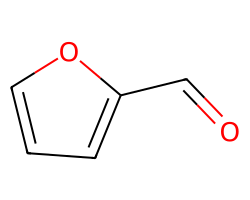

In [3]:
Image(filename='atom_annotation_1.png') 

# Example 2 : Atom-Pair

In [5]:
MF_radius=3
MF_bit=1024

In [21]:
df = pd.read_excel("../../Data.xlsx",sheet_name="560point")

# Select feature for data: X=SMILE, Y=Tb
X_data_excel= df[["SMILES"]]
Y_data= df["Tb"]

# %% Data Preparation
# Generate Fingerprint from SMILE

X_data_use = X_data_excel.copy()
X_data_use["molecule"] = X_data_use["SMILES"].apply(lambda x: Chem.MolFromSmiles(x))

y_data_fp = Y_data.copy()

In [ ]:
X_data_excel.iloc[0]["molecule"]

In [30]:
from rdkit.Chem import rdMolDescriptors
AP = rdMolDescriptors.GetHashedAtomPairFingerprintAsBitVect(X_data_use.iloc[11]["molecule"], nBits=512)
#AP = rdMolDescriptors.GetHashedAtomPairFingerprintAsBitVect(X_data_use.iloc[11], nBits=512,)
print(np.array(AP))

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 

In [ ]:
# %%
# Train-test_Modeling & Cross Validation Modeling


x_train_fp, x_test_fp, y_train_fp, y_test_fp = train_test_split(x_data_fp, y_data_fp,
                                                                test_size=0.20,
                                                                random_state=42)
start_time = time.time()
model = XGB(x_train_fp, y_train_fp)

end_time = time.time()
print("Training Elasped Time : ", end_time-start_time, " seconds")